 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns_data = whale_returns_csv
whale_returns_df = pd.read_csv(whale_returns_data,index_col='Date',infer_datetime_format=True, parse_dates=True) #,index_col='date',infer_datetime_format=True, parse_dates=False
whale_returns_df.tail(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222
2019-04-18,0.001448,0.001222,0.000582,0.001916
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-23,0.007167,0.003485,0.006472,0.013278
2019-04-24,0.002284,0.001009,-0.004000,-0.006386
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [3]:
# Count nulls
# YOUR CODE HERE
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns_data = algo_returns_csv
algo_returns_df = pd.read_csv(algo_returns_data, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_returns_df.tail(10)

,Algo 1,Algo 2
Date,,
2019-04-17,-0.010301,-0.005228
2019-04-18,-0.000588,-0.001229
2019-04-22,0.000677,-0.001936
2019-04-23,0.004969,0.009622
2019-04-24,0.001095,0.000399
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570


In [6]:
# Count nulls
# YOUR CODE HERE
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
algo_returns_df.dropna(inplace = True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_historical_data = sp500_history_csv
sp500_historical_df = pd.read_csv(sp500_historical_data, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500_historical_df.tail(10)

,Close
Date,
2012-10-12,$1428.59
2012-10-11,$1432.84
2012-10-10,$1432.56
2012-10-09,$1441.48
2012-10-08,$1455.88
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99
2012-10-02,$1445.75


In [9]:
# Check Data Types
# YOUR CODE HERE
sp500_historical_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# YOUR CODE HERE
# Removing '$' from values
sp500_historical_df['Close'] = sp500_historical_df['Close'].str.strip('$')
# Changing str values to float
sp500_historical_df['Close'] = sp500_historical_df['Close'].astype('float')
sp500_historical_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
# YOUR CODE HERE
daily_returns_sp500 = sp500_historical_df.pct_change()
daily_returns_sp500.tail(10)

,Close
Date,
2012-10-12,-0.008013
2012-10-11,0.002975
2012-10-10,-0.000195
2012-10-09,0.006227
2012-10-08,0.009990
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123
2012-10-02,-0.003611


In [12]:
# Drop nulls
# YOUR CODE HERE
daily_returns_sp500.dropna(inplace=True)
daily_returns_sp500.tail(10)

,Close
Date,
2012-10-12,-0.008013
2012-10-11,0.002975
2012-10-10,-0.000195
2012-10-09,0.006227
2012-10-08,0.009990
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123
2012-10-02,-0.003611


In [13]:
# Rename Column
# YOUR CODE HERE
daily_returns_sp500 = daily_returns_sp500.rename(columns={ 'Close': 'S&P 500'})
daily_returns_sp500.tail(10)

,S&P 500
Date,
2012-10-12,-0.008013
2012-10-11,0.002975
2012-10-10,-0.000195
2012-10-09,0.006227
2012-10-08,0.009990
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123
2012-10-02,-0.003611


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_returns_df = pd.concat([whale_returns_df, algo_returns_df, daily_returns_sp500], axis='columns', join='inner')
combined_returns_df.tail(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2019-04-08,0.000483,-0.000310,0.000153,0.000841,0.003761,0.000218,0.006105
2019-04-09,-0.005657,-0.004396,-0.006536,-0.002497,0.012012,-0.011639,-0.003466
2019-04-10,0.009808,0.008366,0.002912,0.005269,-0.004221,0.009632,-0.000038
2019-04-11,0.003406,-0.003959,-0.000637,-0.000496,0.001705,-0.001568,-0.006566
2019-04-12,0.005663,-0.001165,0.004217,0.007316,-0.005501,0.004504,0.000630
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

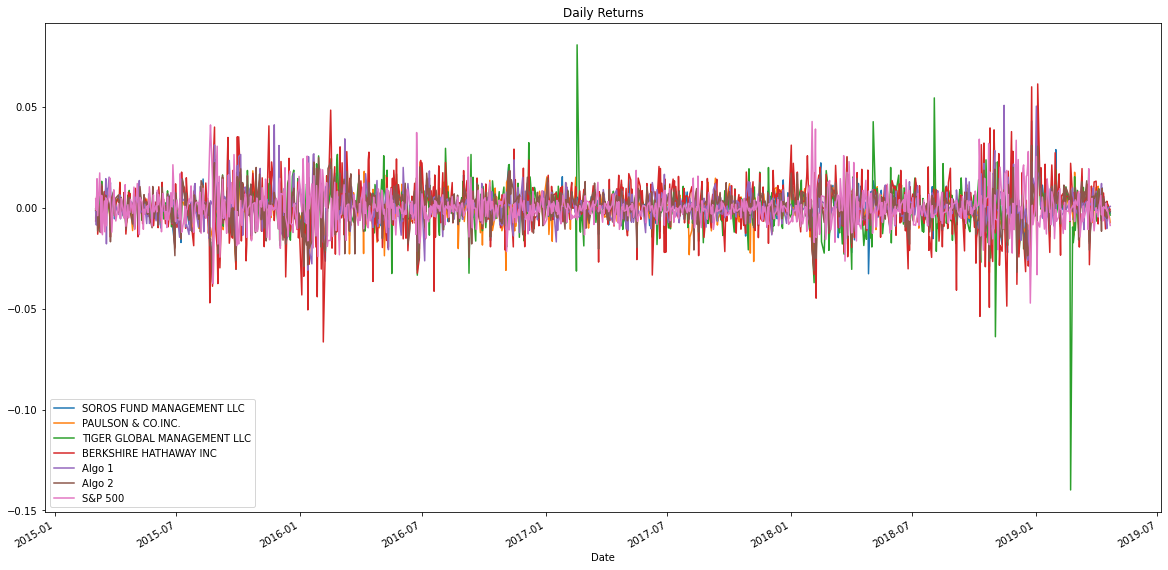

In [15]:
# Plot daily returns
# YOUR CODE HERE
combined_returns_df.plot(figsize=(20,10), title='Daily Returns')

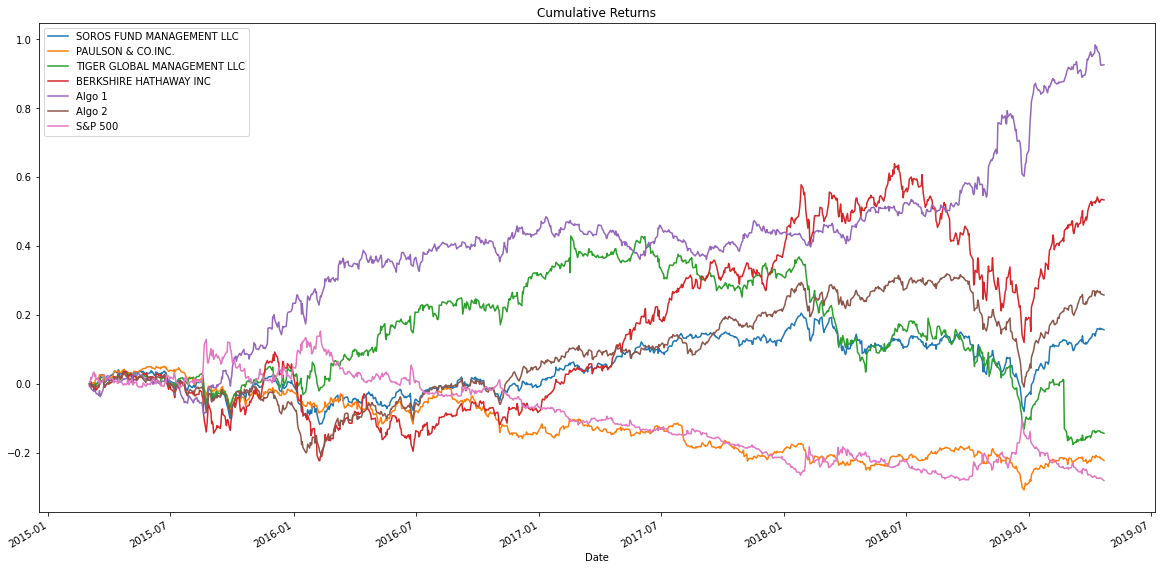

In [16]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_returns_df).cumprod() - 1
cumulative_returns.plot(figsize=(20,10), title='Cumulative Returns')

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

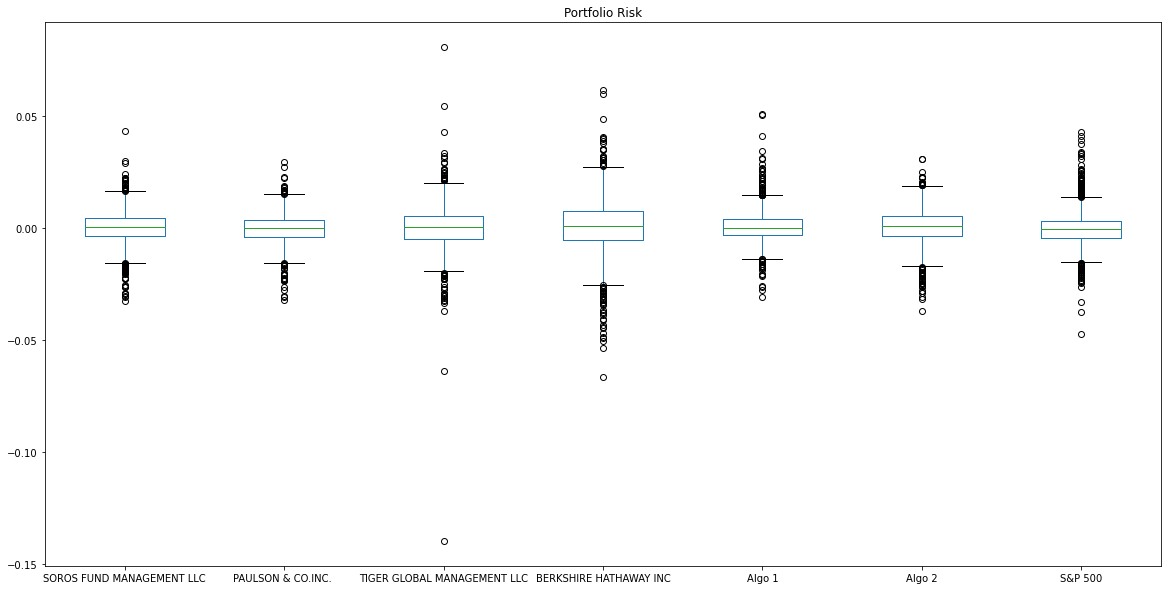

In [17]:
# Box plot to visually show risk
# YOUR CODE HERE
combined_returns_df.plot(kind='box', figsize=(20,10), title='Portfolio Risk')

In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio.
portfolio_stdev = combined_returns_df.std()
portfolio_stdev

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

In [19]:
type(portfolio_stdev)

pandas.core.series.Series

In [20]:
# Which portfolios are riskier than the S&P 500?
sp500_stdev = portfolio_stdev[-1]

# YOUR CODE HERE
# Converting panda series to panda dataframe
portfolio_stdev.to_frame()
# Use one-time anonymous function to iterate boolean condition
portfolio_stdev.apply(lambda x : True if x > sp500_stdev else False)

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [21]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
# Define new variable as  one-time anonymous function that interates and fitlers condition, then drop NaaN values
higher_stdev = portfolio_stdev.where(lambda x : x > sp500_stdev).dropna()
higher_stdev 

TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [22]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
portfolio_stdev_annual = combined_returns_df.std() * np.sqrt (252) 
portfolio_stdev_annual 

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

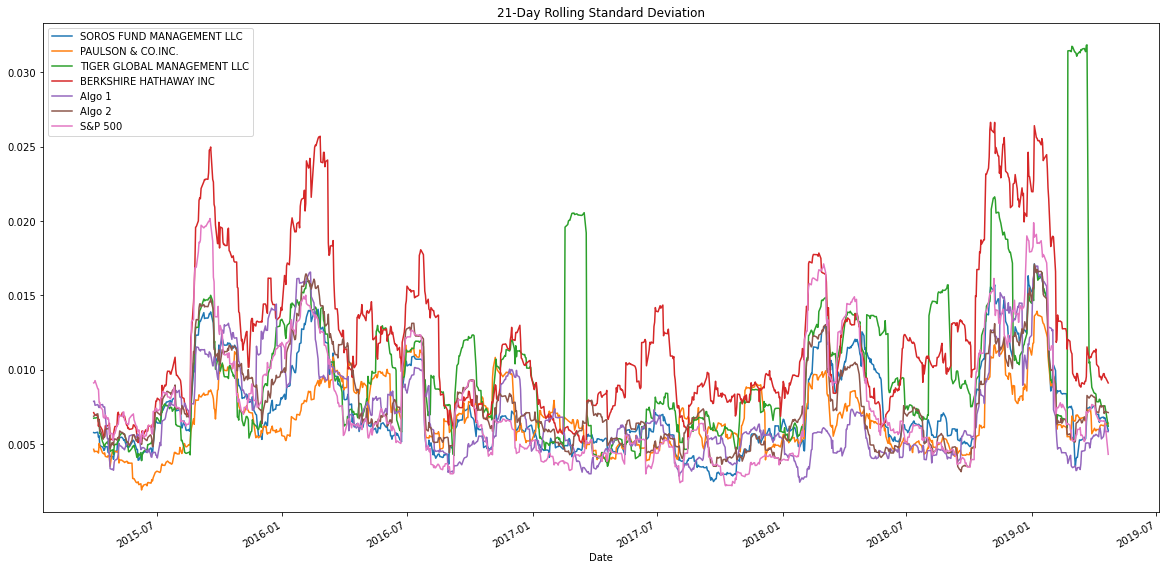

In [23]:
# Calculate and plot the rolling standard deviation for the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
combined_returns_df.rolling(window=21).std().plot(figsize=(20,10), title='21-Day Rolling Standard Deviation')

In [24]:
# Construct a correlation table
# YOUR CODE HERE
combined_returns_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [25]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
combined_covariance = combined_returns_df['TIGER GLOBAL MANAGEMENT LLC'].cov(combined_returns_df['S&P 500'])
combined_covariance

-1.4081131271818174e-07

In [26]:
combined_variance = combined_returns_df['S&P 500'].var()
combined_beta = combined_covariance / combined_variance
combined_beta

-0.0019097027512372758

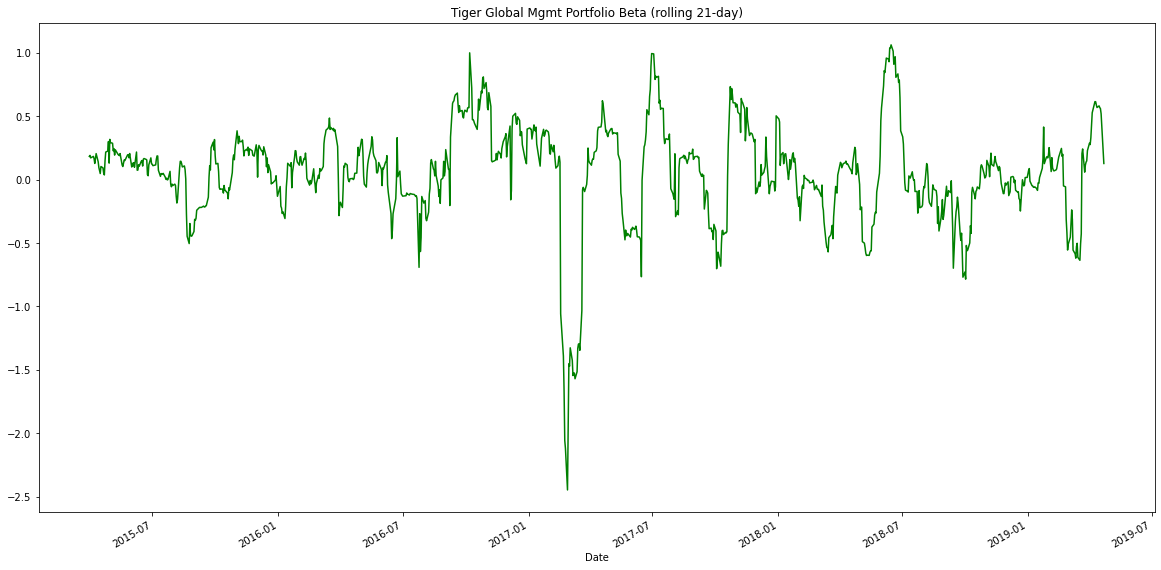

In [27]:
combined_cov_rolling21 = combined_returns_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=21).cov(combined_returns_df['S&P 500']) 
combined_var_rolling21 = combined_returns_df['S&P 500'].rolling(window=21).var() 
combined_beta_rolling21 = combined_cov_rolling21 / combined_var_rolling21 
combined_beta_rolling21.plot(figsize=(20, 10), color = 'green', title="Tiger Global Mgmt Portfolio Beta (rolling 21-day)")

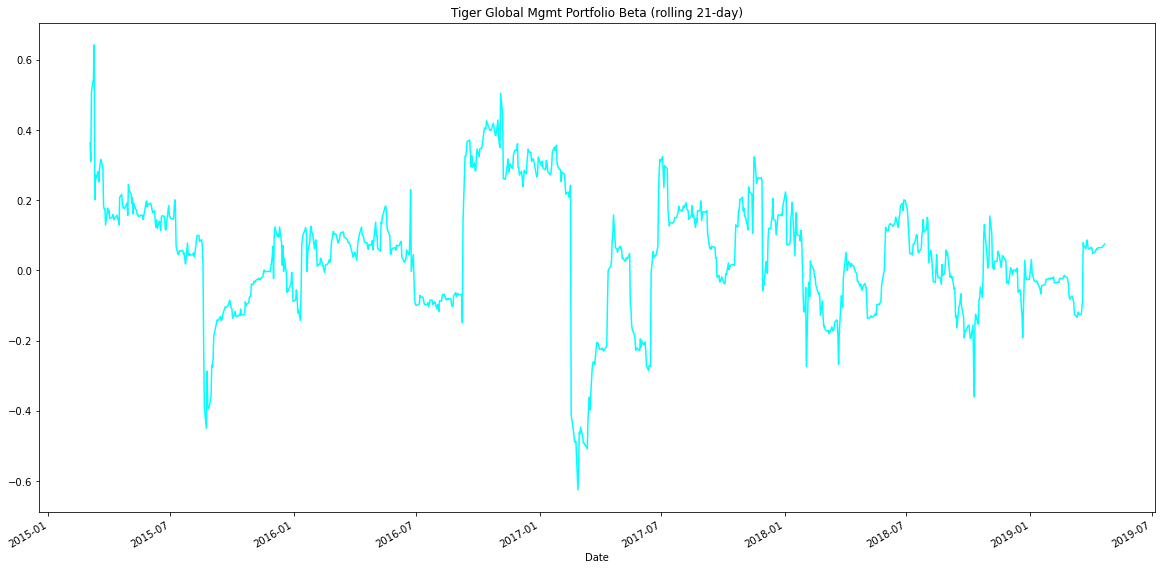

In [28]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
combined_cov_ewm21 = combined_returns_df['TIGER GLOBAL MANAGEMENT LLC'].ewm(halflife=21).cov(combined_returns_df['S&P 500']) 
combined_var_ewm21 = combined_returns_df['S&P 500'].ewm(halflife=21).var() 
combined_beta_ewm21 = combined_cov_ewm21 / combined_var_ewm21 
combined_beta_ewm21.plot(figsize=(20, 10), color = 'cyan', title="Tiger Global Mgmt Portfolio Beta (rolling 21-day)")

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [29]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
combined_sharpe_ratios = (combined_returns_df.mean() * 252) / (combined_returns_df.std() * np.sqrt(252))
combined_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

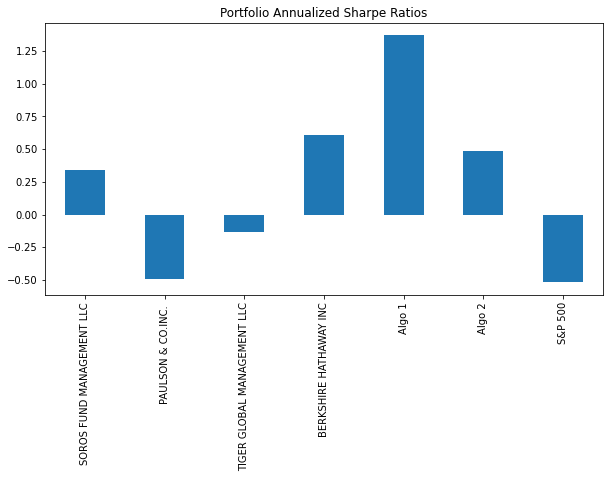

In [30]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
combined_sharpe_ratios.plot(kind="bar",figsize=(10,5), title='Portfolio Annualized Sharpe Ratios')

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at least 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [31]:
# Importing yahoo finance library to download EOD data via function, making it easier to manipulate data since ticker selection/duration are my preference
import yfinance as yf

In [32]:
# Read the first stock: AMZN
# YOUR CODE HERE
amzn_data = yf.download('AMZN',start='2018-01-01', end ='2020-07-19')
amzn_data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-13,3251.060059,3344.290039,3068.389893,3104.000000,3104.000000,7720400
2020-07-14,3089.000000,3127.379883,2950.000000,3084.000000,3084.000000,7231900
2020-07-15,3080.229980,3098.350098,2973.179932,3008.870117,3008.870117,5788900
2020-07-16,2971.060059,3032.000000,2918.229980,2999.899902,2999.899902,6394200
2020-07-17,3009.000000,3024.000000,2948.449951,2961.969971,2961.969971,4739500


In [33]:
type(amzn_data)

pandas.core.frame.DataFrame

In [34]:
amzn_df = amzn_data['Close']
amzn_df.tail()

Date
2020-07-13    3104.000000
2020-07-14    3084.000000
2020-07-15    3008.870117
2020-07-16    2999.899902
2020-07-17    2961.969971
Name: Close, dtype: float64

In [35]:
# Read the second stock: TWLO
# YOUR CODE HERE
twlo_data = yf.download('TWLO',start='2018-01-01', end ='2020-07-19')
twlo_df = twlo_data['Close']
twlo_df.tail()

[*********************100%***********************]  1 of 1 completed


Date
2020-07-13    224.800003
2020-07-14    223.820007
2020-07-15    224.270004
2020-07-16    222.380005
2020-07-17    238.570007
Name: Close, dtype: float64

In [36]:
# Read the third stock: TSLA
# YOUR CODE HERE
tsla_data = yf.download('TSLA',start='2018-01-01', end ='2020-07-20')
tsla_df = tsla_data['Close']
tsla_df.tail()

[*********************100%***********************]  1 of 1 completed


Date
2020-07-13    1497.060059
2020-07-14    1516.800049
2020-07-15    1546.010010
2020-07-16    1500.640015
2020-07-17    1500.839966
Name: Close, dtype: float64

In [37]:
# Read the fourth stock: NFLX
# YOUR CODE HERE
nflx_data = yf.download('NFLX',start='2018-01-01', end ='2020-07-19')
nflx_df = nflx_data['Close']
nflx_df.tail()

[*********************100%***********************]  1 of 1 completed


Date
2020-07-13    525.500000
2020-07-14    524.880005
2020-07-15    523.260010
2020-07-16    527.390015
2020-07-17    492.989990
Name: Close, dtype: float64

In [38]:
# Read the fifth stock: AMD
# YOUR CODE HERE
amd_data = yf.download('AMD',start='2018-01-01', end ='2020-07-19')
amd_df = amd_data['Close']
amd_df.tail()

[*********************100%***********************]  1 of 1 completed


Date
2020-07-13    53.590000
2020-07-14    54.720001
2020-07-15    55.340000
2020-07-16    54.919998
2020-07-17    55.040001
Name: Close, dtype: float64

In [39]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
stocks_df = pd.concat([amzn_df, twlo_df, tsla_df, nflx_df, amd_df], axis="columns", join="inner") 
stocks_df.tail()

,Close,Close,Close,Close,Close
Date,,,,,
2020-07-13,3104.000000,224.800003,1497.060059,525.500000,53.590000
2020-07-14,3084.000000,223.820007,1516.800049,524.880005,54.720001
2020-07-15,3008.870117,224.270004,1546.010010,523.260010,55.340000
2020-07-16,2999.899902,222.380005,1500.640015,527.390015,54.919998
2020-07-17,2961.969971,238.570007,1500.839966,492.989990,55.040001


In [40]:
# Reset the index
# YOUR CODE HERE
stocks_df.columns =['AMZN', 'TWLO', 'TSLA', 'NFLX', 'AMD'] 
stocks_df.reset_index()
stocks_returns = stocks_df.pct_change()
stocks_returns.shape

(640, 5)

In [41]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
'''Code not needed =====> custom_df = stocks_df.pivot_table(values='NOCP', index='Date', columns='Symbol')'''

"Code not needed =====> custom_df = stocks_df.pivot_table(values='NOCP', index='Date', columns='Symbol')"

In [42]:
# Drop Nulls
# YOUR CODE HERE
stocks_returns.dropna(inplace=True)
stocks_returns.shape

(639, 5)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [43]:
# Calculate weighted portfolio returns
weights = [1/5, 1/5, 1/5, 1/5, 1/5]
# YOUR CODE HERE
equal_weight_returns = stocks_returns.dot(weights)
equal_weight_returns.tail()

Date
2020-07-13   -0.041943
2020-07-14    0.004458
2020-07-15    0.001030
2020-07-16   -0.008090
2020-07-17   -0.000550
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [44]:
# Display last 5 rows of variable to find end dates of data
combined_returns_df.tail(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764


In [45]:
# Display first 5 rows of variable to find start dates of data
equal_weight_returns.head()

Date
2018-01-03    0.019551
2018-01-04    0.009595
2018-01-05    0.005382
2018-01-08    0.027292
2018-01-09   -0.013968
dtype: float64

In [46]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
portfolio_all_returns = pd.concat([combined_returns_df, equal_weight_returns], axis="columns", join="inner")
# Define variable as desired header using slicing method
col_8 = portfolio_all_returns.columns[-1]
portfolio_all_returns = portfolio_all_returns.rename(columns={col_8:"Ogo's Stocks"})
portfolio_all_returns.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'S&P 500', 'Ogo's Stocks'],
      dtype='object')

In [47]:
portfolio_all_returns.shape

(326, 8)

In [48]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
portfolio_all_returns.dropna(inplace=True)
portfolio_all_returns.shape

(326, 8)

In [49]:
portfolio_all_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Ogo's Stocks
Date,,,,,,,,
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.003478
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.016682
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.012644
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.004163
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764,0.017650


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [50]:
# Risk
# YOUR CODE HERE
portfolio_all_risk = portfolio_all_returns.std() * np.sqrt (252)
portfolio_all_risk

SOROS FUND MANAGEMENT LLC      0.150687
PAULSON & CO.INC.              0.117343
TIGER GLOBAL MANAGEMENT LLC    0.222843
BERKSHIRE HATHAWAY INC         0.233851
Algo 1                         0.121886
Algo 2                         0.140237
S&P 500                        0.162421
Ogo's Stocks                   0.388551
dtype: float64

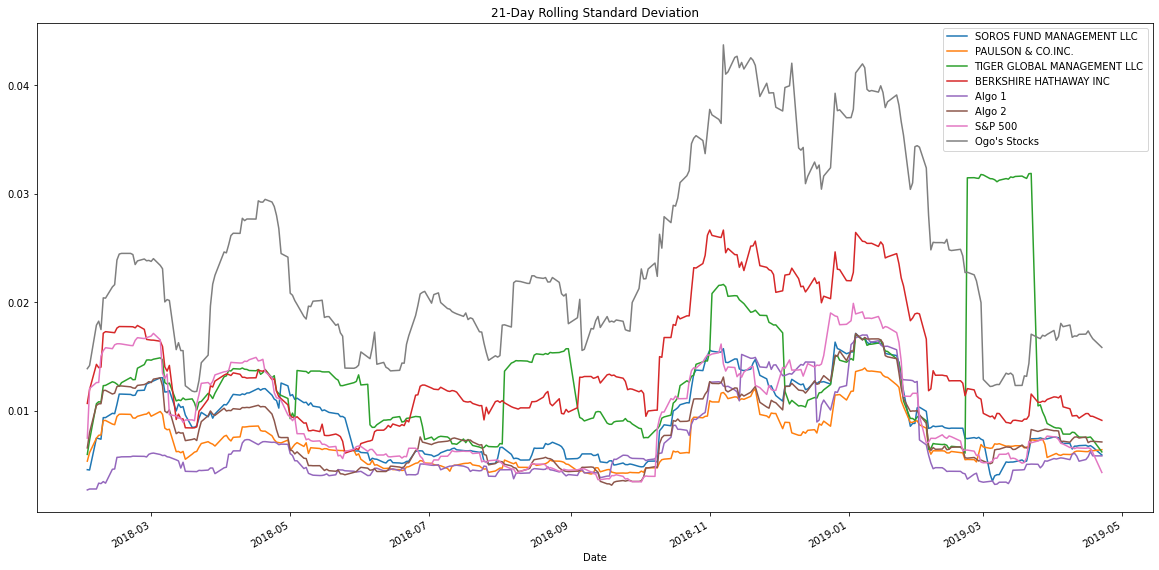

In [51]:
# Rolling
# YOUR CODE HERE
portfolio_all_returns.rolling(window=21).std().plot(figsize=(20,10), title=('21-Day Rolling Standard Deviation'))

In [52]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
portfolio_all_sharpe = (portfolio_all_returns.mean() * 252) / (portfolio_all_returns.std() * np.sqrt(252))
portfolio_all_sharpe

SOROS FUND MANAGEMENT LLC      0.107071
PAULSON & CO.INC.             -0.232653
TIGER GLOBAL MANAGEMENT LLC   -1.352704
BERKSHIRE HATHAWAY INC         0.396695
Algo 1                         1.904971
Algo 2                         0.188529
S&P 500                       -0.291352
Ogo's Stocks                   1.752722
dtype: float64

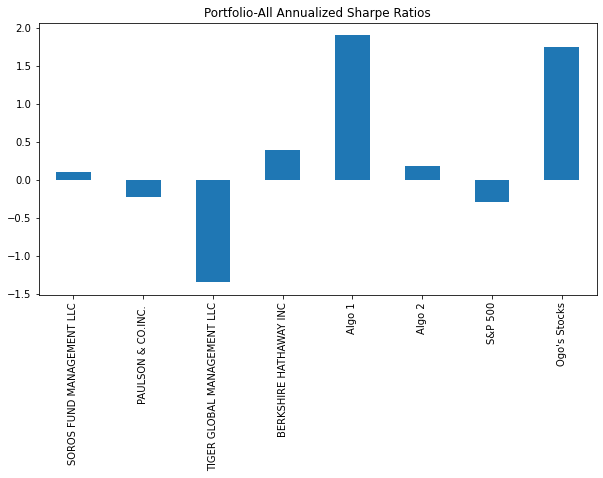

In [53]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
portfolio_all_sharpe.plot(kind="bar",figsize=(10,5), title='Portfolio-All Annualized Sharpe Ratios')

In [54]:
# Create a correlation analysis
# YOUR CODE HERE
portfolio_all_returns.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Ogo's Stocks
SOROS FUND MANAGEMENT LLC,1.000000,0.776339,0.528231,0.794215,0.329808,0.840505,0.004609,0.704564
PAULSON & CO.INC.,0.776339,1.000000,0.537565,0.664120,0.341433,0.805184,-0.015809,0.600191
TIGER GLOBAL MANAGEMENT LLC,0.528231,0.537565,1.000000,0.389752,0.143589,0.488828,-0.022504,0.349591
BERKSHIRE HATHAWAY INC,0.794215,0.664120,0.389752,1.000000,0.315932,0.793240,-0.033783,0.784927
Algo 1,0.329808,0.341433,0.143589,0.315932,1.000000,0.340357,-0.049948,0.261177
Algo 2,0.840505,0.805184,0.488828,0.793240,0.340357,1.000000,-0.023936,0.714057
S&P 500,0.004609,-0.015809,-0.022504,-0.033783,-0.049948,-0.023936,1.000000,0.020146
Ogo's Stocks,0.704564,0.600191,0.349591,0.784927,0.261177,0.714057,0.020146,1.000000


In [55]:
# Beta
# YOUR CODE HERE
portfolio_all_covariance = portfolio_all_returns["Ogo's Stocks"].cov(portfolio_all_returns['S&P 500']) 
portfolio_all_covariance

5.045214397484113e-06

In [56]:
portfolio_all_variance = portfolio_all_returns['S&P 500'].var() 
portfolio_all_beta = portfolio_all_covariance / portfolio_all_variance
portfolio_all_beta

0.04819421697060978

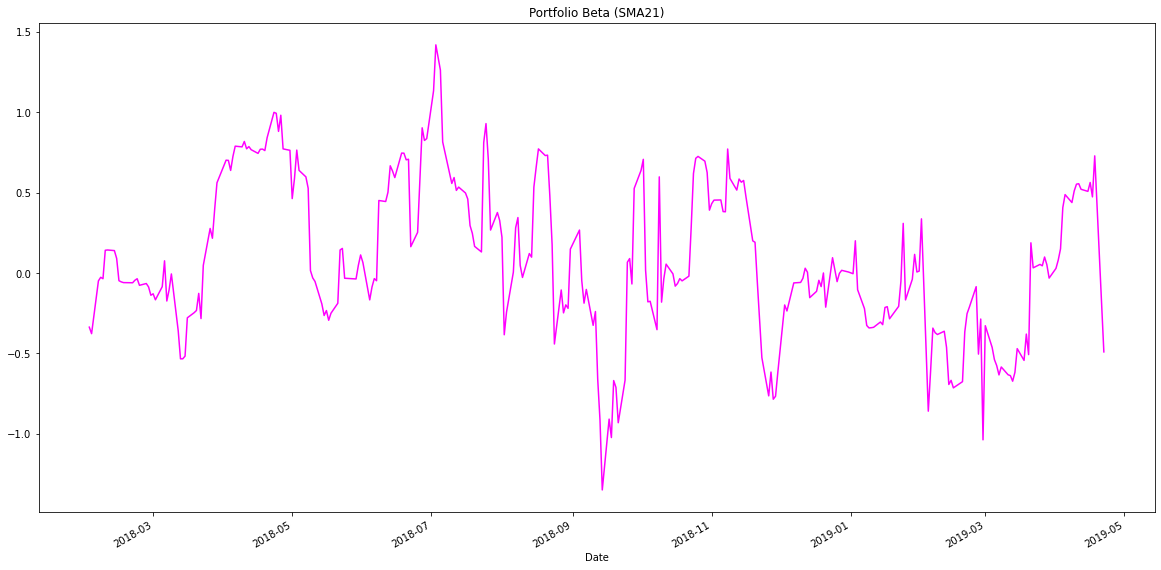

In [57]:
portfolio_all_cov_rolling21 = portfolio_all_returns["Ogo's Stocks"].rolling(window=21).cov(portfolio_all_returns['S&P 500']) 
portfolio_all_var_rolling21 = portfolio_all_returns['S&P 500'].rolling(window=21).var() 
portfolio_all_beta_rolling21 = portfolio_all_cov_rolling21 / portfolio_all_var_rolling21 
portfolio_all_beta_rolling21.plot(figsize=(20, 10), color ='magenta', title='Portfolio Beta (SMA21)')

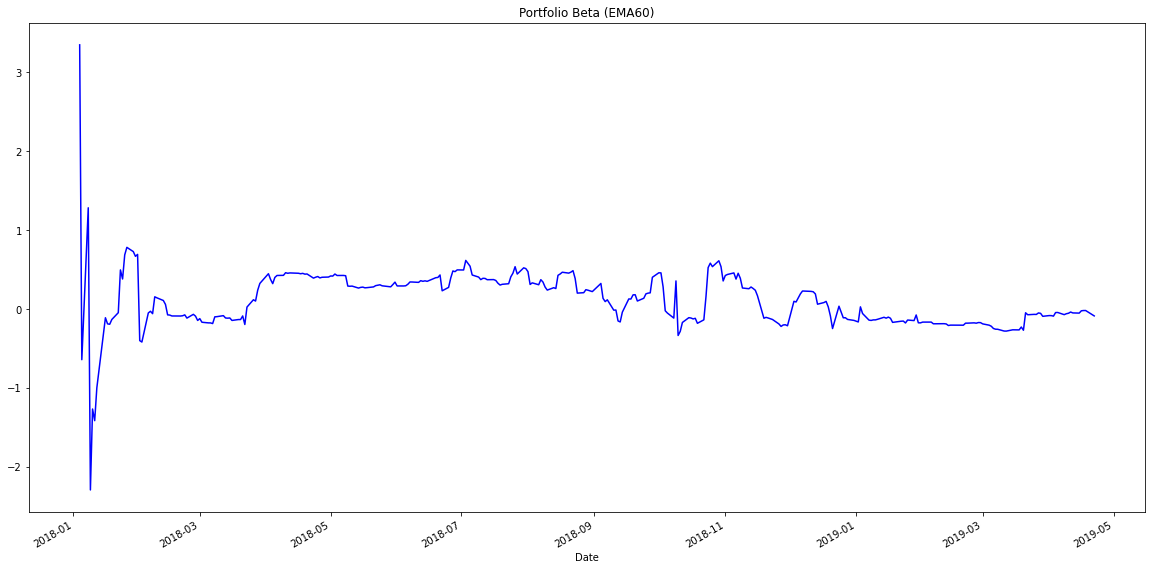

In [58]:
portfolio_all_cov_ewm21 = portfolio_all_returns["Ogo's Stocks"].ewm(halflife=21).cov(portfolio_all_returns['S&P 500']) 
portfolio_all_var_ewm21 = portfolio_all_returns['S&P 500'].ewm(halflife=21).var() 
portfolio_all_beta_ewm21 = portfolio_all_cov_ewm21 / portfolio_all_var_ewm21 
portfolio_all_beta_ewm21.plot(figsize=(20, 10), color ='blue', title='Portfolio Beta (EMA60)')